In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [8]:
bias = 100
X, y, coef = make_regression(n_samples=100, n_features=1, bias=bias,noise=10, random_state=42, coef=True)

In [9]:
X.shape, y.shape

((100, 1), (100,))

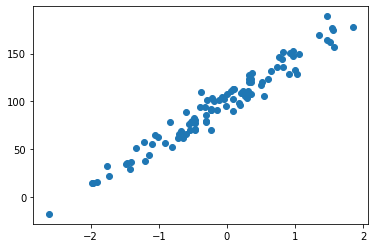

In [10]:
plt.scatter(X, y)

In [11]:
coef, bias # here i have m and c from sklearn

(array(41.74110031), 100)

In [13]:
y_gen = X * coef + bias #eq of line

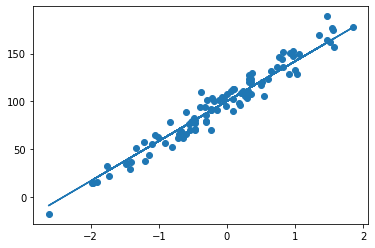

In [14]:
plt.scatter(X, y)
plt.plot(X, y_gen)

In [16]:
# lets plot a line using LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [22]:
model.fit(X,y)
# work during training? figuring out m and c

LinearRegression()

In [28]:
# _ at end in python means that this value was not there initially it has been created after some function is executed 
model.coef_, model.intercept_

(array([44.43716999]), 101.16511532052698)

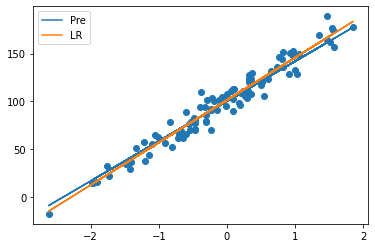

In [29]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="LR")
plt.legend()

## Custom implementation

In [30]:
class LinearRegCustom:
    # constructor
    def __init__(self, lr=0.1):
        self.lr = lr
    
    # training function i.e. fit
    def fit(self, X, y):
        self._X = X # _X mock behavior like private
        self._y = y.reshape(-1, 1) # converting into a 2-D array to do calculations, else it will give error due to some numpy shape
        
        # need to figure out value of coef & intercept
        # step 1: pick these values at random 
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        # gradient descent
        errors = []
        
        # lets say we do this 50 times
        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())
        return errors
    
    def gradient_decend(self):
        # change in coef and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yh = self.predict(self._X) # from predict funtion
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

In [31]:
model = LinearRegCustom(lr=.1)

In [33]:
errors = model.fit(X, y)

In [34]:
model.coef_, model.intercept_

(43.25441116396166, 100.29661938051765)

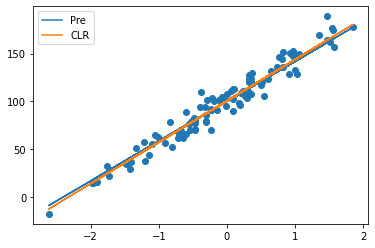

In [35]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

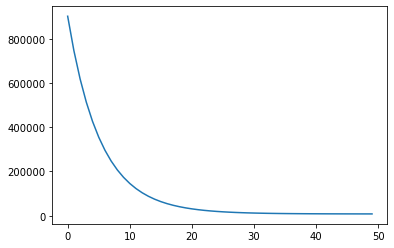

In [36]:
plt.plot(errors)

In [38]:
# for i in range(1, 10):
#     model = LinearRegCustom(lr=.5 * i)
#     errors = model.fit(X, y)
    
#     plt.figure()
    
#     plt.title(str(.5 * i))
#     plt.plot(errors)

## housing problem

In [39]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

In [40]:
X, y = load_boston(return_X_y=True)

In [48]:
# boston = load_boston()
# print(boston.DESCR)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
model.predict(X_test[:1])

array([28.53469469])

In [52]:
y_test[:1]

array([23.6])

## Salary dataset

In [53]:
dataset = pd.read_csv("Salary_Data.csv")

In [55]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [57]:
model = LinearRegression()

In [58]:
model.fit(X_train, y_train)

LinearRegression()

In [59]:
model.predict(X_test[:5])

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028])

In [60]:
y_test[:5]

array([112635.,  67938., 113812.,  83088.,  64445.])

In [61]:
model.score(X_test, y_test)

0.9553063138044949

In [64]:
yrs = int(input("How many yrs of experience do you have: "))
sal = model.predict(np.array([yrs]).reshape(-1, 1))
print("\nYour estimated salary is $", sal[0])

How many yrs of experience do you have:  5



Your estimated salary is $ 72454.5292246185
